# **Erik Santana Montelongo**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Archivos a dataframes
redwine = pd.read_csv('/content/winequality-red.csv', sep=";")
whitewine = pd.read_csv('/content/winequality-white.csv', sep=";")

# **Mostrar la matriz de correlación de variables**

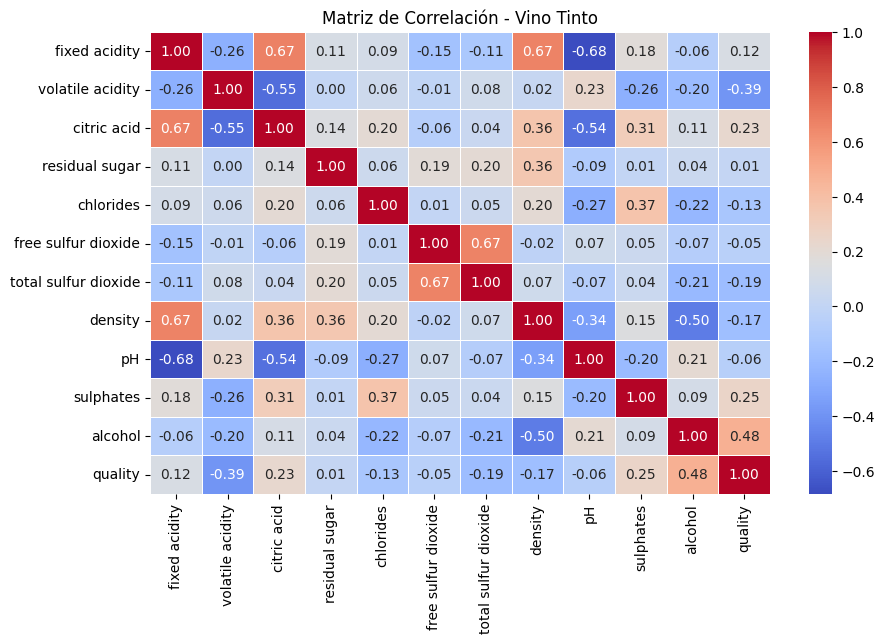

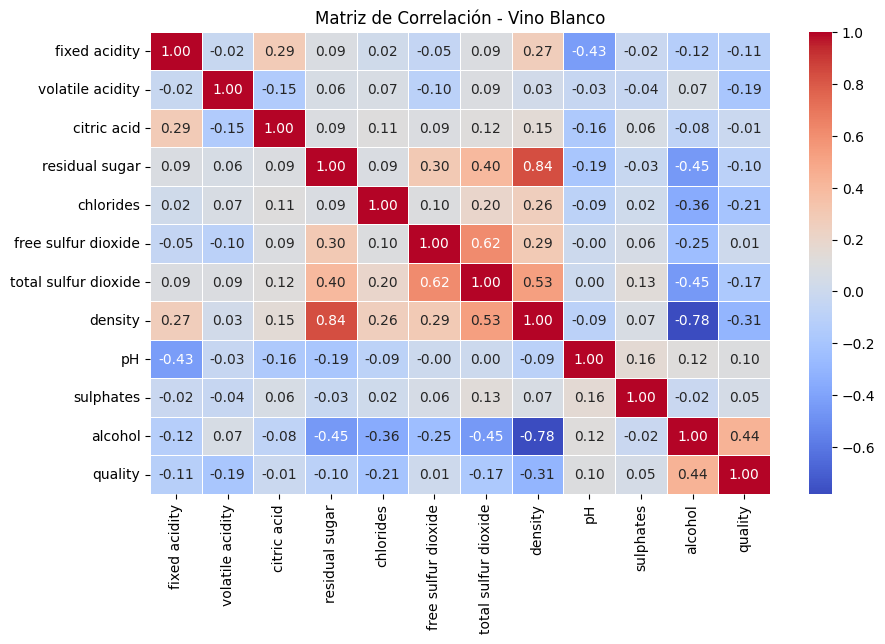

In [3]:
# Matriz de correlación para redwine
plt.figure(figsize=(10, 6))
sns.heatmap(redwine.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Vino Tinto")
plt.show()

# Matriz de correlación para whitewine
plt.figure(figsize=(10, 6))
sns.heatmap(whitewine.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Vino Blanco")
plt.show()

# **RED WINE DATASET**

## **Aplicar cualquier otra técnica de selección de características que consideres adecuados y justificar tu propuesta**


Uso RandomForest porque nos da la importancia de cada variable, y asi nos quedamos con las mas relevantes

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Definir variables predictoras y objetivo
X_red = redwine.drop(columns=["quality"])
y_red = redwine["quality"]

# Entrenar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_red, y_red)

# Obtener importancia de características
feature_importances = pd.Series(rf.feature_importances_, index=X_red.columns)
selected_features = feature_importances.nlargest(5).index.tolist()  # Seleccionar las 5 más importantes

print("Características seleccionadas:", selected_features)

# Nuevo dataframe con solo las variables más relevantes
redwine_selected = redwine[selected_features + ["quality"]]


Características seleccionadas: ['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'density']


## **Realizar una comparativa de la precisión en el entrenamiento de los diferentes modelos de NaiveBayes y KNN. Aplicando Cross Validation**

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separar características y variable objetivo
X = redwine.drop(columns=['quality'])
y = redwine['quality']

# Escalar los datos con StandardScaler (para GaussianNB y KNN)
scaler_std = StandardScaler()
X_scaled_std = scaler_std.fit_transform(X)

# Escalar los datos con MinMaxScaler (para MultinomialNB y BernoulliNB)
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X)

# Modelos a evaluar
models = {
    "GaussianNB": (GaussianNB(), X_scaled_std),
    "MultinomialNB": (MultinomialNB(), X_scaled_minmax),
    "BernoulliNB": (BernoulliNB(), X_scaled_minmax),
    "KNN (k=5)": (KNeighborsClassifier(n_neighbors=5), X_scaled_std)
}

# Aplicar Cross Validation y comparar precisión
cv_results = {}

for name, (model, X_scaled) in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results[name] = scores.mean()

# Mostrar resultados
for model, accuracy in cv_results.items():
    print(f"{model}: Precisión promedio = {accuracy:.4f}")


GaussianNB: Precisión promedio = 0.5222
MultinomialNB: Precisión promedio = 0.5297
BernoulliNB: Precisión promedio = 0.4265
KNN (k=5): Precisión promedio = 0.5253


## **Una vez decides el modelo que consideras mejor, entonces realizar las siguientes tareas:**

## Entrenarlo y obtener la matriz de confusión.



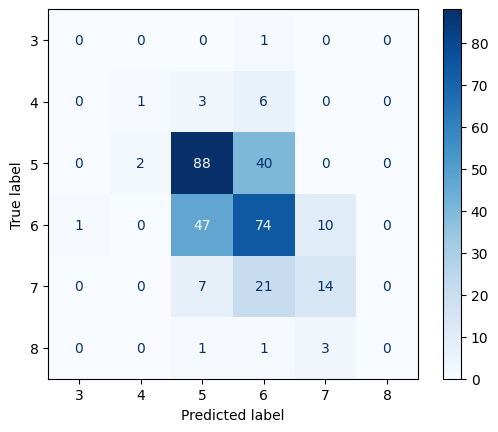

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separar características y variable objetivo
X = redwine.drop(columns=['quality'])
y = redwine['quality']

# Escalar los datos con StandardScaler (para KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = knn.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='Blues')

## Exportar a un fichero los parámetros del modelo entrenado.






In [7]:
import joblib
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Exportar el modelo entrenado a un archivo
joblib.dump(knn, 'knn_model.pkl')

# Opcional: también podemos guardar los parámetros del modelo (ejemplo: los parámetros de KNN)
model_params = knn.get_params()

# Guardar los parámetros en un archivo de texto
with open('knn_model_params.txt', 'w') as f:
    for param, value in model_params.items():
        f.write(f"{param}: {value}\n")

print("Modelo y parámetros exportados correctamente.")


Modelo y parámetros exportados correctamente.


## Importar los parámetros del modelo.

Desde un archivo de texto .txt

In [8]:
# Leer los parámetros del modelo desde el archivo de texto
model_params = {}
with open('knn_model_params.txt', 'r') as f:
    for line in f:
        param, value = line.strip().split(': ')
        model_params[param] = value

# Mostrar los parámetros importados
print("Parámetros importados del modelo:")
print(model_params)


Parámetros importados del modelo:
{'algorithm': 'auto', 'leaf_size': '30', 'metric': 'minkowski', 'metric_params': 'None', 'n_jobs': 'None', 'n_neighbors': '5', 'p': '2', 'weights': 'uniform'}


Desde el modelo guardado .pkl

In [9]:
import joblib

# Cargar el modelo KNN desde el archivo .pkl
knn_loaded = joblib.load('knn_model.pkl')

# Obtener los parámetros del modelo cargado
model_params = knn_loaded.get_params()

# Mostrar los parámetros importados
print("Parámetros importados del modelo cargado:")
print(model_params)


Parámetros importados del modelo cargado:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


## **Aplicar el modelo (predict) a todos los datos del dataset y obtener la matriz de confusión.**

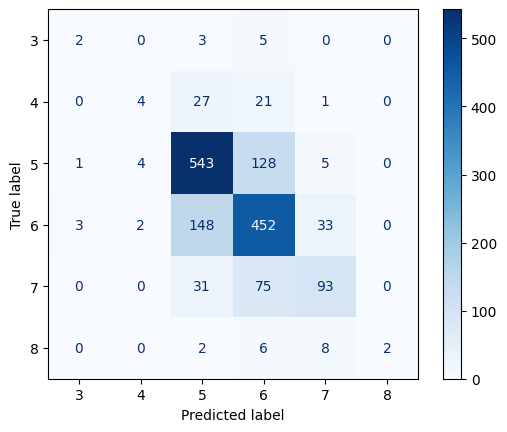

In [10]:
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Cargar el modelo KNN previamente guardado (si ya fue guardado con joblib)
knn_loaded = joblib.load('knn_model.pkl')

# Separar las características y la variable objetivo
X = redwine.drop(columns=['quality'])
y = redwine['quality']

# Escalar los datos con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar predicciones sobre todos los datos (X)
y_pred_all = knn_loaded.predict(X_scaled)

# Generar la matriz de confusión
cm = confusion_matrix(y, y_pred_all)

# Mostrar la matriz de confusión
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='Blues')


## **Comparar el resultado obtenido con el valor de calidad indicado en el dataset por medio de una matriz de confusión**

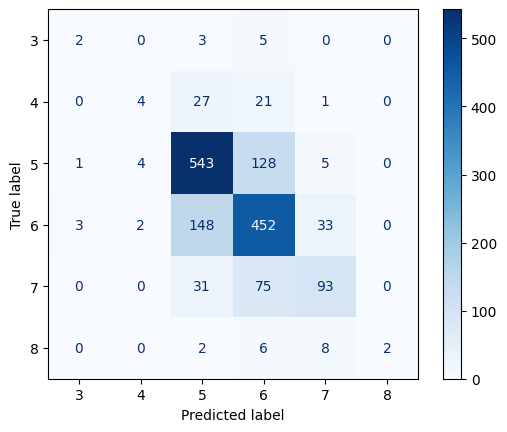

In [11]:
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Cargar el modelo KNN previamente guardado (si ya fue guardado con joblib)
knn_loaded = joblib.load('knn_model.pkl')

# Separar las características (X) y la variable objetivo (y) que es la calidad
X = redwine.drop(columns=['quality'])
y = redwine['quality']

# Escalar los datos con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar predicciones sobre todos los datos (X)
y_pred_all = knn_loaded.predict(X_scaled)

# Generar la matriz de confusión comparando las etiquetas reales (y) con las predicciones (y_pred_all)
cm = confusion_matrix(y, y_pred_all)

# Mostrar la matriz de confusión
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='Blues')

## Obtener la precisión del resultado obtenido, para determinar si coincide con la precisión que se calculó durante el entrenamiento

In [12]:
from sklearn.metrics import accuracy_score

# Realizar predicciones sobre todos los datos (X_scaled)
y_pred_all = knn_loaded.predict(X_scaled)

# Calcular la precisión (accuracy) del modelo en todo el dataset
accuracy = accuracy_score(y, y_pred_all)

# Mostrar la precisión obtenida
print(f"Precisión obtenida en todo el dataset: {accuracy:.4f}")


Precisión obtenida en todo el dataset: 0.6854


# **WHITE WINE DATASET**

## **Aplicar cualquier otra técnica de selección de características que consideres adecuados y justificar tu propuesta**

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Definir variables predictoras y objetivo
X_white = whitewine.drop(columns=["quality"])
y_white = whitewine["quality"]

# Entrenar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_white, y_white)

# Obtener importancia de características
feature_importances = pd.Series(rf.feature_importances_, index=X_white.columns)
selected_features = feature_importances.nlargest(5).index.tolist()  # Seleccionar las 5 más importantes

print("Características seleccionadas:", selected_features)

# Nuevo dataframe con solo las variables más relevantes
whitewine_selected = whitewine[selected_features + ["quality"]]


Características seleccionadas: ['alcohol', 'density', 'volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide']


## **Realizar una comparativa de la precisión en el entrenamiento de los diferentes modelos de NaivaBayes y KNN. Aplicando Cross Validation**

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separar características y variable objetivo
X = whitewine.drop(columns=['quality'])
y = whitewine['quality']

# Escalar los datos con StandardScaler (para GaussianNB y KNN)
scaler_std = StandardScaler()
X_scaled_std = scaler_std.fit_transform(X)

# Escalar los datos con MinMaxScaler (para MultinomialNB y BernoulliNB)
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X)

# Modelos a evaluar
models = {
    "GaussianNB": (GaussianNB(), X_scaled_std),
    "MultinomialNB": (MultinomialNB(), X_scaled_minmax),
    "BernoulliNB": (BernoulliNB(), X_scaled_minmax),
    "KNN (k=5)": (KNeighborsClassifier(n_neighbors=5), X_scaled_std)
}

# Aplicar Cross Validation y comparar precisión
cv_results = {}

for name, (model, X_scaled) in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results[name] = scores.mean()

# Mostrar resultados
for model, accuracy in cv_results.items():
    print(f"{model}: Precisión promedio = {accuracy:.4f}")


GaussianNB: Precisión promedio = 0.4306
MultinomialNB: Precisión promedio = 0.4488
BernoulliNB: Precisión promedio = 0.4488
KNN (k=5): Precisión promedio = 0.4700


## **Una vez decides el modelo que consideras mejor, entonces realizar las siguientes tareas:**

## Entrenarlo y obtener la matriz de confusión.

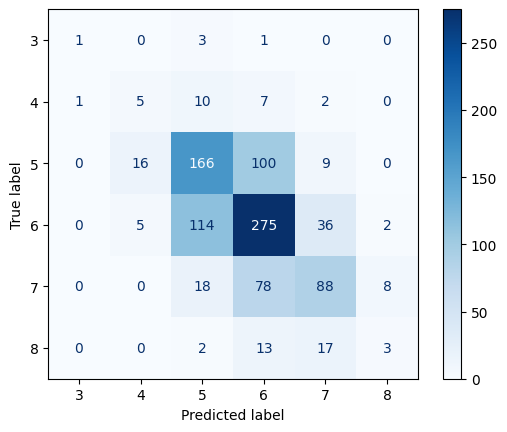

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Separar características y variable objetivo
X = whitewine.drop(columns=['quality'])
y = whitewine['quality']

# Escalar los datos con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = knn.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtener las etiquetas únicas en y (calidad real) y en y_pred (calidad predicha)
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Crear una visualización de la matriz de confusión
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)

# Crear solo el gráfico de la matriz de confusión (sin gráfico vacío)
cm_display.plot(cmap='Blues')

# Mostrar el gráfico
plt.show()


## Exportar a un fichero los parámetros del modelo entrenado.

In [16]:
import joblib
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Exportar el modelo entrenado a un archivo
joblib.dump(knn, 'knn_model_white.pkl')

# Opcional: también podemos guardar los parámetros del modelo (ejemplo: los parámetros de KNN)
model_params = knn.get_params()

# Guardar los parámetros en un archivo de texto
with open('knn_white_model_params.txt', 'w') as f:
    for param, value in model_params.items():
        f.write(f"{param}: {value}\n")

print("Modelo y parámetros exportados correctamente.")


Modelo y parámetros exportados correctamente.


## Importar los parámetros del modelo.

Desde un archivo de texto .txt

In [17]:
# Leer los parámetros del modelo desde el archivo de texto
model_params = {}
with open('knn_white_model_params.txt', 'r') as f:
    for line in f:
        param, value = line.strip().split(': ')
        model_params[param] = value

# Mostrar los parámetros importados
print("Parámetros importados del modelo:")
print(model_params)

Parámetros importados del modelo:
{'algorithm': 'auto', 'leaf_size': '30', 'metric': 'minkowski', 'metric_params': 'None', 'n_jobs': 'None', 'n_neighbors': '5', 'p': '2', 'weights': 'uniform'}


Desde el modelo guardado .pkl

In [18]:
import joblib

# Cargar el modelo KNN desde el archivo .pkl
knn_loaded = joblib.load('knn_model_white.pkl')

# Obtener los parámetros del modelo cargado
model_params = knn_loaded.get_params()

# Mostrar los parámetros importados
print("Parámetros importados del modelo cargado:")
print(model_params)

Parámetros importados del modelo cargado:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


## **Aplicar el modelo (predict) a todos los datos del dataset y obtener la matriz de confusión.**

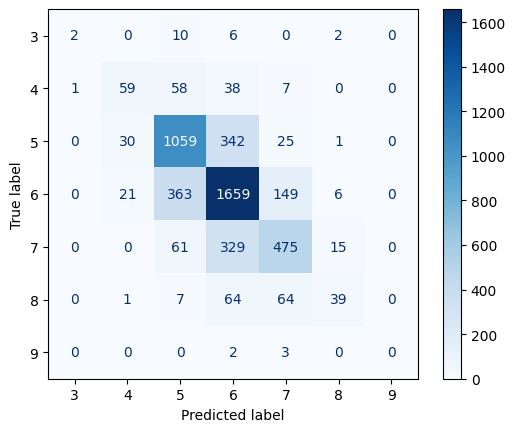

In [20]:
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Cargar el modelo KNN previamente guardado (si ya fue guardado con joblib)
knn_loaded = joblib.load('knn_model_white.pkl')

# Separar las características y la variable objetivo
X = whitewine.drop(columns=['quality'])
y = whitewine['quality']

# Escalar los datos con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar predicciones sobre todos los datos (X)
y_pred_all = knn_loaded.predict(X_scaled)

# Generar la matriz de confusión
cm = confusion_matrix(y, y_pred_all)

# Mostrar la matriz de confusión
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='Blues')


## **Comparar el resultado obtenido con el valor de calidad indicado en el dataset por medio de una matriz de confusión**

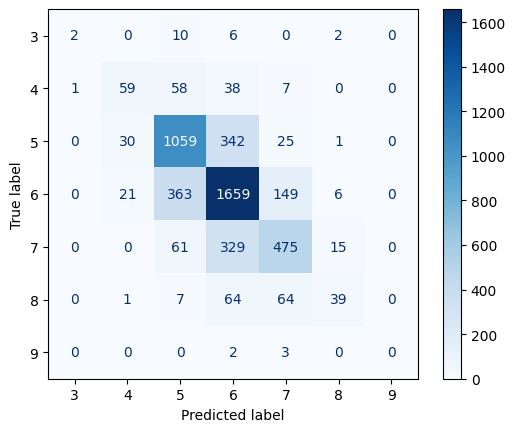

In [21]:
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Cargar el modelo KNN previamente guardado (si ya fue guardado con joblib)
knn_loaded = joblib.load('knn_model_white.pkl')

# Separar las características (X) y la variable objetivo (y) que es la calidad
X = whitewine.drop(columns=['quality'])
y = whitewine['quality']

# Escalar los datos con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar predicciones sobre todos los datos (X)
y_pred_all = knn_loaded.predict(X_scaled)

# Generar la matriz de confusión comparando las etiquetas reales (y) con las predicciones (y_pred_all)
cm = confusion_matrix(y, y_pred_all)

# Mostrar la matriz de confusión
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='Blues')

## Obtener la precisión del resultado obtenido, para determinar si coincide con la precisión que se calculó durante el entrenamiento

In [22]:
from sklearn.metrics import accuracy_score

# Realizar predicciones sobre todos los datos (X_scaled)
y_pred_all = knn_loaded.predict(X_scaled)

# Calcular la precisión (accuracy) del modelo en todo el dataset
accuracy = accuracy_score(y, y_pred_all)

# Mostrar la precisión obtenida
print(f"Precisión obtenida en todo el dataset: {accuracy:.4f}")


Precisión obtenida en todo el dataset: 0.6723
